## Antes de começar...

Nessa prática, iremos entender melhor o conceito de Overfitting e underfitting além de ter o primeiro contato com um método de aprendizado de máquina supervisionado (Árvore de Decisão). Para isso, iremos usar a biblioteca [Scikit Learn](https://scikit-learn.org), além das bibliotecas que usamos na prática passada: pandas, matplotlib e numpy. Clique no código abaixo e pressione ctrl+enter para executá-lo.

Para isso, se necessário, instale tais bibliotecas usando `pip3 install pandas matplotlib numpy` (em alguns Sistemas Operacionais/configurações, você usará `pip` ao inves de `pip3`)

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

### ...um pouquinho mais sobre 🐼🐼

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">**Método drop**</a> Remove colunas ou linhas do dataframe. Utilize inplace=True para a modificação ocorrer no dataframe que está sendo modificado. Veja exemplo:

In [2]:
df = pd.DataFrame(np.arange(20).reshape(5, 4),columns=['ana', 'bruna', 'carol', 'daniel'])
print(df)
print("\n\n depois de remover... \n\n")
print(df.drop(['carol', 'daniel'], axis=1))

   ana  bruna  carol  daniel
0    0      1      2       3
1    4      5      6       7
2    8      9     10      11
3   12     13     14      15
4   16     17     18      19


 depois de remover... 


   ana  bruna
0    0      1
1    4      5
2    8      9
3   12     13
4   16     17


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html">**Método sample**</a> Extrai uma amostra aleatória do Dataframe. Utilize random_state = "número inteiro" para que seja embaralhado sempre da mesma forma - importante para [reprodutibilidade dos resultados](https://pt.wikipedia.org/wiki/Reprodutibilidade). Além disso, você pode remover a amostra selecionada da amostra original por meio dos índices (precisam ser únicos).

In [3]:
df_sample = df.sample(frac=0.6, random_state=1)
df_sample

,ana,bruna,carol,daniel
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


Remoção da amostra selecionada:

In [4]:
df_retirando_sample = df.drop(df_sample.index)
df_retirando_sample

,ana,bruna,carol,daniel
0,0,1,2,3
3,12,13,14,15


## Overfitting - Exemplo Ilustrativo

A principio, vamos fazer um dataset artificial em que possuimos dois atributos (também chamado de caracteríscas ou, do inglês, *features*) e duas possíveis saídas (também chamado de valor alvo ou classe alvo). Para isso, temos a matriz `x` e o vetor `y` em que, para cada exemplo `i`, cada linha `x[i]` dessa matriz representa esse exemplo (neste caso, representado por dois atributos) e a classe alvo `y[i]`.

Veja o dataset:

In [5]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(400, noise=0.25)
x[:10]#10 primeiras linhas da matriz X

array([[-0.49511301,  0.96602758],
       [ 1.71424117, -0.49933902],
       [ 1.3702969 , -0.37944818],
       [-1.11477769,  0.16771336],
       [-0.13290417, -0.14821564],
       [ 0.62307375,  0.86983696],
       [-0.91762377,  0.58061579],
       [ 0.07292557, -0.44423885],
       [-0.74499852,  0.89696524],
       [-0.26472071,  0.47607795]])

In [6]:
y[:10]#lista com 10 primeiros itens do vetor y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

Nessa e nas demais práticas, iremos representar a classe alvo como um vetor `y` e, os atributos, pela matriz `x`.

Abaixo, podemos ver a representação gráfica deste dataset em que, para cada instancia `i`, o eixo x é o atributo `x[i][0]` e o eixo y é o atributo `x[i][1]` a classe alvo `y[i]` é representada pela cor.

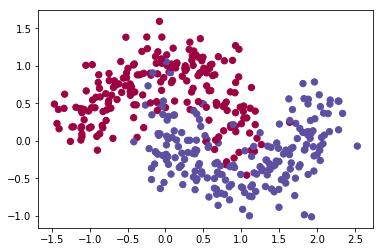

In [7]:
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Inicialmente, no aquivo `arvore_de_decisao.py` implemente a função `cria_modelo`. Veja a seguir as instruções de como implementá-la.

Nessa função, você deverá criar um modelo baseado em arvore de decisão, por meio de um treino. Para o treino, use a variável `x` (que pode ser uma matriz ou DataFrame) em que, cada linha, é uma instância representada pelos seus atributos, além disso, a `y` é um vetor ou Series  representando a classe alvo  de cada instância. Coloque como `random_state=1` que é o seed (semente) da função aleatória usada, pois, por padrão, a árvore de decisão do Scikit learn obtém os dados de forma aleátoria. Definindo este parametro, garantimos que o resultado será o mesmo em todas as execuções.

Além disso, com o objetivo de avaliarmos o overfitting, essa função possuirá o parametro `min_samples_split` que 
 que define o mínimo de exemplos necessários para que um nodo da árvore efetue a divisão. Use esse parâmetro ao instanciar a Árvore de Decisão. 

Para implementar essa função, use a classe `DecisionTreeClassifier`. [Veja a documentação desta classe](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Se necessário, comente a importação abaixo, copie e cole a função aqui e, logo após, volte ela para o arquivo. Para criar/obter o modelo use o [método fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit).  Após implementar, execute o teste abaixo.

In [8]:
!python3 -m tests TestDecisionTree.test_cria_modelo

Python não encontrado; execute sem argumentos para instalar na Microsoft Store ou desabilite este atalho a partir de Configurações > Gerenciar Aliases de Execução do Aplicativo.


Logo após, execute o código abaixo para importar a função criada. Lembre-se de reiniciar o kernel caso faça alguma modificação na mesma após importar.

In [9]:
from arvore_decisao import cria_modelo

Abaixo, crie um modelo utilizando o dataset criado anteriormente com a função make_moons e use a função `plot_decision_boundary` para gerar o grafico apresentado o dataset ilustrativo com a superfície de decisão do modelo criado. Essa função está no arquivo `util.py`.

Na criação do modelo, altere o parametro `min_samples` até um valor que você julgue adequado. Veja o *overfitting* em valores muito baixos (abaixo de 1%, principalmente) e *underfitting* em valores muito altos. Como usualmente implementada, a porcentagem nesta função é um valor entre 0 e 1 em que 1 representa 100% 0.5, por exemplo, representa 50%.

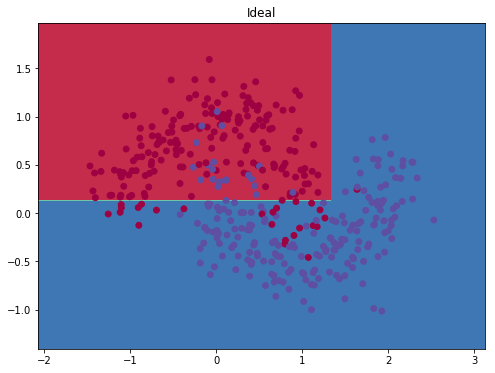

In [10]:
from util import plot_decision_boundary

np.random.seed(0)
x, y = sklearn.datasets.make_moons(400, noise=0.25)
x1=[]
x2=[]
for xi in x:
    x1.append(xi[0])
    x2.append(xi[1])
df = pd.DataFrame({"X1":x1,"X2":x2})
modeloIdeal = cria_modelo(df,y,.5)
plot_decision_boundary(modeloIdeal,x,y)
plt.title("Ideal")
plt.show()

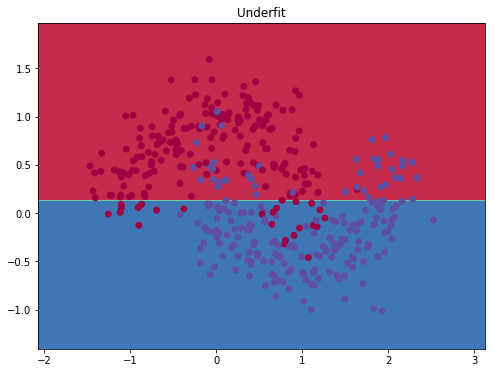

In [11]:
modeloUnder = cria_modelo(df,y,.9)
plot_decision_boundary(modeloUnder,x,y)
plt.title("Underfit")
plt.show()

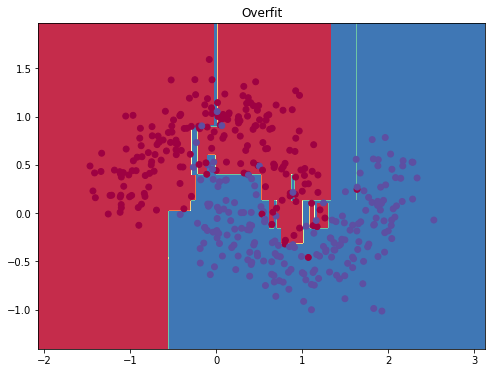

In [12]:
modeloOver = cria_modelo(df,y,.0000000001)
plot_decision_boundary(modeloOver,x,y)
plt.title("Overfit")
plt.show()

In [13]:
modeloOver.score(x, y)

1.0

## Impacto do Overfitting/Underfitting - Estimativa Automática da Qualidade de Conteúdo

Nesta prática, iremos usar dados de 3.294 artigos da Wikipédia rotulados manualmente quanto a sua qualidade. 

Esses artigos passaram por uma avaliação pela comunidade de editores da Wikipedia. Tais editores classificaram esses artigos quanto a qualidade da seguinte forma: 

- **Artigo Destaque (FA)**: Os artigos atribuídos a esta classe são, de acordo com os avaliadores, os melhores artigos da Wikipédia.
- **Classe A (AC)**: os artigos da Classe A são considerados completos, mas com alguns problemas pendentes que precisam ser resolvidos para serem promovidos a Artigos em destaque.
- **Artigo Bons (GA)**: Bons Artigos são aqueles sem problemas de lacunas ou conteúdo excessivo. Essas são boas fontes de informação, embora outras enciclopédias possam fornecer um conteúdo melhor.
- **Classe B (BC)**: os artigos atribuídos a essa classe são considerados úteis para a maioria dos usuários, mas carecem de informações mais precisas.
- **Classe Inicial (ST)**: os artigos da Classe Inicial ainda estão incompletos, embora contenham referências e ponteiros para informações mais completas.
- **Artigos Rascunhos (SB)**: os artigos de toco são artigos de rascunho, com poucos parágrafos. Eles também têm poucas ou nenhumas citações.

Assim, [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) fizeram o preprocessamento desses artigos para serem extraídos indicadores de qualidades tais como: idade do artigo, tamanho, número de citações. Com tais indicadores e a classe de qualidade, foi possível realizar a predição automática de qualidade de artigos da Wikipédia.

Nesta prática, iremos fazer a previsão da qualidade usando os indicadores proposto por [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) e uma árvore de decisão.

Inicialmente, uso um DataFrame pandas e [leia o arquivo `wikipedia.csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) e exiba os dados deste dataset. Coloque como o rótulo da linha o id do artigo (ou seja, no dataset, a coluna `id` será a `index_col` do DataFrame).

In [14]:
df = pd.read_csv("wikipedia.csv",index_col='id')
df

,realClass,histAge,histAgePerReview,histReviewsPerUser,histDiscussionCount,histIPCount,histReviewCount,histUserCount,histModifiedLinesRate,histOccasionalUsersReviewsRate,...,minAbsLen,XLinksPerSec,ssCount,sCount,numExtLink,tamMaiorFrase,avgSLen,meanSubsectionPerSection,LinksPerTLen,avgPLen
id,,,,,,,,,,,,,,,,,,,,,
9915833,SB,1000.0,0.14,1.67,4.0,0.0,5.0,5.0,0.00,100.00,...,0.0,0.0000,0.0,0.0,0.0,19.0,0.000000e+00,0.0000,11.1209,9.3333
6044227,SB,1230.0,14.43,4.00,4.0,12.0,64.0,52.0,21.52,21.88,...,347.0,0.7500,0.0,4.0,3.0,40.0,7.167500e+02,0.0000,114.6800,62.7500
317070,GA,2271.0,1.39,2.53,30.0,373.0,856.0,483.0,16.10,26.17,...,553.0,0.2500,4.0,8.0,2.0,104.0,2.691500e+03,0.5000,169.5433,247.2222
9119240,FA,2852.0,0.49,2.64,147.0,1286.0,2635.0,1349.0,23.13,22.47,...,3847.0,2.4000,12.0,10.0,24.0,199.0,4.369400e+03,1.2000,170.0156,173.9231
14105,AC,2859.0,1.43,2.07,84.0,184.0,600.0,416.0,3.95,41.67,...,449.0,1.3333,9.0,6.0,8.0,163.0,4.666333e+03,1.5000,102.5568,111.3929
157814,FA,2543.0,1.46,2.87,237.0,502.0,1224.0,722.0,9.49,25.57,...,2815.0,0.7000,8.0,10.0,7.0,146.0,5.002800e+03,0.8000,255.2449,240.3462
3135714,FA,1480.0,4.47,4.59,127.0,109.0,614.0,505.0,1.32,19.71,...,3030.0,4875.0000,20.0,8.0,39.0,104.0,1.498538e+07,2.5000,280.1005,169129.0000
9704143,ST,1010.0,7.48,3.33,3.0,2.0,32.0,30.0,4.76,21.88,...,2471.0,0.0000,0.0,2.0,0.0,90.0,4.326000e+03,0.0000,157.3091,132.7143
1471706,FA,1759.0,3.60,3.59,66.0,141.0,378.0,237.0,2.70,20.90,...,1756.0,0.7500,11.0,8.0,6.0,356.0,3.844750e+03,1375.0000,287.4579,441.4000


Antes de executar a classificação e verificar o acerto no treino e teste, você deverá implementar a função `divide_treino_teste` que está no arquivo `arvore_decisao.py`.

Essa função deverá dividir os dados, de forma aleatoria, em treino e teste.  Para isso, faça o seguinte: 

1. Crie o DataFrame `df_treino` por meio do Dataframe `df` e a proporção `val_proporcao_treino`, passados como parâmetro. `val_proporcao_treino` assume um valor de 0 a 1 em que, por exemplo, 0.8 representa que 80% das instancias serão de treino e, o restante, o teste. . O [método `sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) irá auxiliar para isso. Use como parâmetro `random_state=1`. Esse será o valor da semente (seed) da função aleatória para manter sempre os dados embaralhados da mesma forma (o teste automatizado só irá funcionar caso tenha colocado a esse valor de semente);

2. Conforme dito, o restante das instancias estarão em `df_teste`. Uma forma fácil de criar o `df_teste` é obter os elementos que estão em `df` e não estão em `df_treino`. Para isso, use [o método `drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) que elimina conlunas ou  linhas de um DataFrame. Para eliminar as linhas, obtenha o id de cada linha do treino usando `df_treino.index`.

Em Python uma função pode retornar mais de um elemento. Por exemplo:

In [15]:
def xuxu():
    a = 2
    b = 3
    return a,b
x,y = xuxu()
print(x)

2


Execute o seguinte testa para verificar a corretude de seu código: 

In [16]:
!python -m tests TestDecisionTree.test_divide_treino_teste

.
----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


A seguir, execute a função `divide_treino_teste` com uma divisão de 80% de treino e, logo após, usando df_treino e df_teste, crie as seguintes variáveis:
-  `x_treino` : DataFrame que representa, para cada linha do **treino**, todos os atributos de um exemplo do treino. Para isso, elimine a coluna que representa a classe por meio [método `drop` do DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), alterando o parametro axis;
- `y_treino`: Series que representa, para cada posição `i`, a classe alvo do exemplo `i` representado pelos atributos `x_treino[i]`. A classe alvo está na coluna `realClass`;
- `x_teste`: Similar ao `x_teste`, porém com as instancias do **teste**. 
- `y_teste`: Similar ao `y_treino`, porém, são as classe alvo do teste; 


In [17]:
from arvore_decisao import divide_treino_teste

#execute a função divide_treino_teste corretamente
df_treino, df_teste = divide_treino_teste(df,.8)

#instancias de treino - separe as features x da classe y
x_treino = df_treino.drop("realClass",axis=1)
y_treino = df_treino["realClass"]


#instancias de teste - separe as features x da classe y
x_teste = df_teste.drop("realClass",axis=1)
y_teste = df_teste["realClass"]

Implemente agora o método `faz_classificacao`. Ele passará como parametro as variáveis `X_treino`, `y_treino`, `X_teste`, `y_teste`, criadas anteriormente além do parâmetro `min_samples` que define a quantidade mínima de instancias para que se divida um nodo da árvore de decisão.

Assim, esta função irá:

1- Criar o modelo a partir dos dados de treino e o parametro `min_samples` (você pode usar a função criada anteriormente);

2- Realizar a predição usando o [método predict](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict). Esse método retorna uma lista de predição em que, para cada posição `i`, retorna o resultado previsto do exemplo representado por `x_teste[i]`;

3- A partir da lista obtida pela predição e da variável `y_teste`, calcule a `acuracia` que é a proporção de acertos, ou seja, $acuracia = acertos/|y_{teste}|$ em que `acertos` é a quantidade de acertos da predição e $y_{teste}$ é a lista `y_teste`.

Dicas:
- caso tenhamos duas listas `a` e `b`, ao fazer a operação `a==b`, ele retornará uma lista em que o valor  de cada posição será igual a verdadeiro caso `a==b`.
- np.sum soma os valores de um vetor, caso os valores sejam booleanos, será considerado True=1 e False=0.


Logo após, execute o teste abaixo:

In [18]:
!python -m tests TestDecisionTree.test_faz_classificacao

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [19]:
from arvore_decisao import faz_classificacao
y_predicted,acuracia =  faz_classificacao(x_treino, y_treino, x_teste, y_teste, .13)

print("Acurácia: {0}".format(acuracia)) 

Acurácia: 0.5220030349013657


Por meio da função `plot_performance_min_samples` crie um gráfico em que o eixo `x` é a variação do parâmetro `min_samples` e, o eixo `y`, representará a acurácia. Você deverá veriar o `min_samples` de 0.001 até 0.7 de 0.01 em 0.01 passos. Esse gráfico possuirá duas linhas: representando a **acurácia no treino** durante a variação do `min_samples` e, a outra, a **acurácia do teste** com os diversos valores de `min_sample`.

- foi usada a função arange do numpy para o for (ao invés de range). Pois o range permite apenas passos com valores inteiros;
- para obter a acurácia no treino, o teste deverá possuir as mesmas instancias do treino;
- Para plotar foi usado o matplotlib veja: [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html).

Execute abaixo a função plot_performance_min_samples usando as veriáveis X_treino,y_treino,X_teste,y_teste

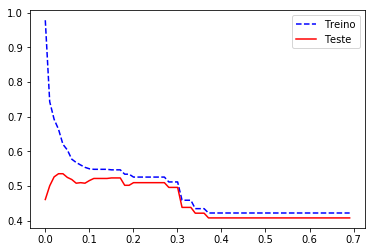

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.001000,0.011000,0.021000,0.031000,0.041000,0.051000,0.061000,0.071000,0.081000,0.091000,...,0.601000,0.611000,0.621000,0.631000,0.641000,0.651000,0.661000,0.671000,0.681000,0.691000
1,0.978368,0.743454,0.692600,0.663757,0.620493,0.604175,0.577609,0.568121,0.560911,0.554080,...,0.422391,0.422391,0.422391,0.422391,0.422391,0.422391,0.422391,0.422391,0.422391,0.422391
2,0.461305,0.500759,0.526555,0.535660,0.535660,0.525038,0.518968,0.508346,0.509863,0.508346,...,0.408194,0.408194,0.408194,0.408194,0.408194,0.408194,0.408194,0.408194,0.408194,0.408194


In [20]:
from arvore_decisao import plot_performance_min_samples
plot_performance_min_samples(x_treino, y_treino, x_teste, y_teste)

Escreva abaixo **um paragrafo** descrevendo o que pode ser visto no gráfico e quando há overfitting.

Atenção! Nesta nossa prática, variamos o parametro no teste para ver o impacto da variável `min_samples_split` no mesmo. Porém,  caso quisessems comparar este classificador com outro, **não devemos usar informação do teste para construir o classificador** pois o teste deve reproduzir "o mundo real" e não saberiamos os valores do teste a priori.  

Assim, não é metodologicamente correto escolher um parâmetro pelo teste. Para resolver esse problema, poderemos ter uma partição de validação. 


**Opcional**: Divida os dados em 60% de treino, 20% de validação e 20% de teste. Use a partição de validação para descobrir o melhor parametro `min_samples` (melhor=maior acurácia). Por meio dele, treine o modelo e calcule o resultado no teste. Além da acurácia, use a função [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para exibir outras métricas de avaliação disponíveis no Scikit Learn.

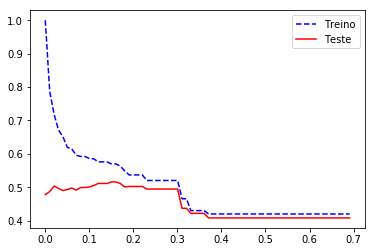

In [22]:
from arvore_decisao import *
# Recarregando dados
df = pd.read_csv("wikipedia.csv",index_col='id')

# Dividindo dados em 80% (Treino + Validação) e 20% (Teste)
df_temp, df_teste = divide_treino_teste(df,.8)
x_temp = df_temp.drop("realClass",axis=1)
y_temp = df_temp["realClass"]

x_teste = df_teste.drop("realClass",axis=1)
y_teste = df_teste["realClass"]

# Dividindo o treino e a validação (60% e 20%)
df_treino, df_validacao = divide_treino_teste(df_temp,.75)
x_treino = df_treino.drop("realClass",axis=1)
y_treino = df_treino["realClass"]

x_validacao = df_teste.drop("realClass",axis=1)
y_validacao = df_teste["realClass"]

results = plot_performance_min_samples(x_treino, y_treino, x_validacao, y_validacao)

In [51]:
best_acc = (results.iloc[2].sort_values(ascending = False)).iloc[0], (results.iloc[2].sort_values(ascending = False))
best_acc

(0.5159332321699545, 16    0.515933
 15    0.515933
 12    0.511381
 17    0.511381
 13    0.511381
 14    0.511381
 11    0.505311
 2     0.503794
 22    0.502276
 21    0.502276
 20    0.502276
 19    0.502276
 18    0.500759
 10    0.500759
 8     0.499241
 9     0.499241
 6     0.497724
 3     0.496206
 23    0.494689
 28    0.494689
 30    0.494689
 25    0.494689
 29    0.494689
 26    0.494689
 27    0.494689
 24    0.494689
 5     0.493171
 7     0.491654
 4     0.490137
 1     0.487102
         ...   
 56    0.408194
 57    0.408194
 58    0.408194
 59    0.408194
 68    0.408194
 53    0.408194
 62    0.408194
 63    0.408194
 64    0.408194
 65    0.408194
 66    0.408194
 67    0.408194
 61    0.408194
 51    0.408194
 52    0.408194
 50    0.408194
 49    0.408194
 48    0.408194
 47    0.408194
 46    0.408194
 45    0.408194
 44    0.408194
 43    0.408194
 42    0.408194
 41    0.408194
 40    0.408194
 39    0.408194
 38    0.408194
 37    0.408194
 69    0.408194
 Nam

**Opcional²** Como a qualidade pode ser encarada como uma nota em uma escala, modelar este problema como regressão pode ser melhor. Por isso, use [regressão e RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) e apresente o [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) obtido. Usando o treino e **validação** descubra o melhor valor para `min_samples_split`, apresente o grafico (similar ao da atividade que usamos da função `plot_decision_boundary`), e use o melhor parametro obtido na validação para o teste.





